# **Aprendizado não supervisionado**

**Objetivos:**
- Compreender os princípios e a aplicação dos principais algoritmos de clusterização.
- Implementar os algoritmos KMeans, DBSCAN e Clusterização Hierárquica
- Utilizar métodos como o método do cotovelo (Elbow Method) e a silhueta para determinar a quantidade ideal de clusters no KMeans.
- Comparar a performance dos algoritmos em diferentes conjuntos de dados.
- Avaliar os resultados da clusterização e interpretar os clusters formados.






### **1. Introdução**

A **clusterização** é uma técnica de aprendizado não supervisionado que visa agrupar um conjunto de objetos de tal forma que os objetos dentro de cada grupo (ou **cluster**) sejam mais semelhantes entre si do que com os objetos de outros grupos. Em outras palavras, a clusterização é o processo de dividir dados em grupos ou categorias baseados em suas semelhanças ou padrões, sem a necessidade de rótulos pré-existentes.

Essa técnica é amplamente utilizada em diversas áreas, como análise de mercado, segmentação de clientes, análise de padrões em grandes volumes de dados, reconhecimento de padrões em imagens, entre outras. O objetivo é encontrar estruturas ocultas ou padrões nos dados, que podem ser úteis para análise e tomada de decisões.

Existem diferentes algoritmos de clusterização, e a escolha do algoritmo pode depender da natureza dos dados e do tipo de estrutura que se deseja encontrar. Nesta atividade, os alunos irão explorar três dos algoritmos mais populares: **KMeans**, **DBSCAN** e **Clusterização Hierárquica**, aprendendo como aplicá-los e como avaliar seus resultados.



### **2. Preparação do Ambiente**

Antes de começar a implementação dos algoritmos de clusterização, é necessário garantir que o ambiente de trabalho esteja configurado corretamente.

#### 2.1 Importação de Bibliotecas e Pacotes

Para esta atividade, utilizaremos as seguintes bibliotecas:

- **`numpy`**: Biblioteca fundamental para cálculos numéricos em Python.
- **`pandas`**: Biblioteca para manipulação e análise de dados, como DataFrames.
- **`matplotlib`**: Biblioteca para visualização gráfica de dados.
- **`seaborn`**: Biblioteca para visualização de dados baseada no `matplotlib`, com uma interface mais simples e gráficos de alta qualidade.
- **`scikit-learn`**: Biblioteca essencial para aprendizado de máquina, que contém os algoritmos de KMeans, DBSCAN e Clusterização Hierárquica.
- **`scipy`**: Biblioteca para operações científicas que será útil para a clusterização hierárquica.




#### 2.2 Código para Importação

Para importar as bibliotecas necessárias, use o seguinte código no seu Google Colab:



In [2]:

# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


### **3. Carregamento dos Dados**




**3.1. Dataset Iris**

O **Iris Dataset** é um dos conjuntos de dados mais clássicos e amplamente utilizados em problemas de aprendizado de máquina, especialmente para demonstrações de **classificação** e **clusterização**. Ele contém informações sobre três espécies de flores da família *Iris* (setosa, versicolor e virginica), com 150 amostras no total.

- **Características**:
  - Comprimento da sépala
  - Largura da sépala
  - Comprimento da pétala
  - Largura da pétala
  
- **Objetivo**: Agrupar as amostras em clusters com base nas características das flores, sem usar as etiquetas (espécies). Esse dataset é útil para avaliar como os algoritmos de clusterização podem distinguir diferentes tipos de flores apenas com base em suas medidas morfológicas.

- **Tamanho**: 150 amostras, 4 características (features).



In [3]:
iris = load_iris()
data_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2




**3.2. Dataset Sintético**

O **dataset sintético** foi gerado artificialmente usando a função `make_blobs` do `scikit-learn`, que cria dados com múltiplos centros de cluster. Este tipo de dataset é útil para testar como os algoritmos de clusterização funcionam em um ambiente controlado, onde a verdadeira estrutura dos dados é conhecida.

- **Características**:
  - 2 características bidimensionais (Feature 1 e Feature 2).
  
- **Objetivo**: O dataset sintético é ideal para ilustrar e entender o comportamento dos algoritmos de clusterização, especialmente no caso de KMeans, onde se pode observar claramente como os diferentes clusters são formados e como a quantidade de clusters impacta o agrupamento.

- **Tamanho**: 300 amostras, 2 características.



In [5]:
# Gerar um conjunto de dados sintético com 3 clusters
X_sintetico, y_sintetico = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0,n_features=2)

# Converter para DataFrame para facilitar a visualização
data_sintetico = pd.DataFrame(X_sintetico, columns=['Feature 1', 'Feature 2'])

# Exibir as primeiras linhas do dataset sintético
data_sintetico.head()


,Feature 1,Feature 2
0,0.428577,4.973997
1,1.619909,0.067645
2,1.432893,4.376792
3,-1.578462,3.034458
4,-1.658629,2.267460



**3.3 Wine Dataset**

O **Wine Dataset** é um conjunto de dados que contém informações sobre diferentes tipos de vinhos, com base em características químicas e físicas dos vinhos. Esse conjunto de dados é frequentemente utilizado em problemas de **classificação**, mas também é excelente para análise de **clusterização**, já que contém muitas variáveis que podem ser agrupadas com base em similaridades.

- **Características**:
  - Álcool
  - Ácidos voláteis
  - Cálcio
  - Fósforo
  - Sódio
  - Magnésio
  - E muitos outros parâmetros químicos e físicos.

- **Objetivo**: Realizar a clusterização dos vinhos com base nas suas características. Embora o dataset original seja rotulado (com 3 classes de vinhos), a ideia é agrupá-los sem usar os rótulos e observar quais clusters os algoritmos de clusterização formam, levando em consideração as semelhanças nas características dos vinhos.

- **Tamanho**: 178 amostras, 13 características.





In [6]:

wine = load_wine()

# Criar um DataFrame com as características e os rótulos
data_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

# Exibir as primeiras linhas do dataset Wine
data_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### **4. KMeans**


O algoritmo **KMeans** é um dos métodos mais populares de **clusterização**. Ele é um algoritmo **não supervisionado** utilizado para particionar um conjunto de dados em **K clusters** baseados nas suas características. O objetivo do KMeans é dividir os dados de forma que a soma das distâncias quadradas entre os pontos e os centróides dos clusters seja minimizada.

**Como funciona o KMeans?**
1. **Inicialização**: O algoritmo começa escolhendo aleatoriamente **K** pontos no espaço de características como os centróides iniciais dos clusters.
2. **Atribuição**: Cada ponto do conjunto de dados é atribuído ao centroide mais próximo, formando **K clusters**.
3. **Atualização**: Depois que os pontos foram atribuídos, o centroide de cada cluster é recalculado como a média dos pontos atribuídos a ele.
4. **Repetição**: Os passos 2 e 3 são repetidos até que as atribuições de cluster não mudem mais (ou até que o número máximo de iterações seja alcançado).


Agora, vamos aplicar o algoritmo KMeans para agrupar os dados em 3 clusters.



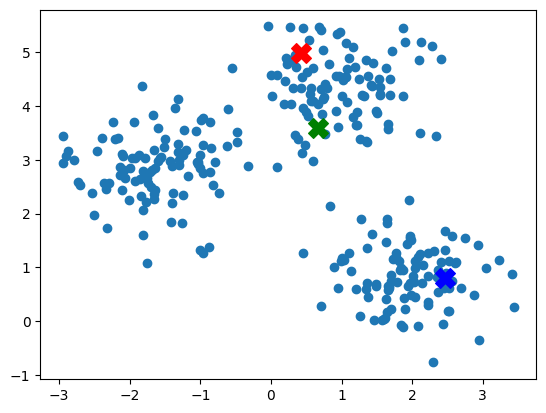

In [17]:
# Plotar os pontos dos clusters
plt.scatter(data_sintetico['Feature 1'], data_sintetico['Feature 2'])
#Centróide 1
plt.scatter(data_sintetico['Feature 1'][0], data_sintetico['Feature 2'][0], c='red', s=200, marker='X', label='Centróides')
#Centróide 2
plt.scatter(data_sintetico['Feature 1'][100], data_sintetico['Feature 2'][100], c='blue', s=200, marker='X', label='Centróides')
#Centróide 3
plt.scatter(data_sintetico['Feature 1'][150], data_sintetico['Feature 2'][150], c='green', s=200, marker='X', label='Centróides')

/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


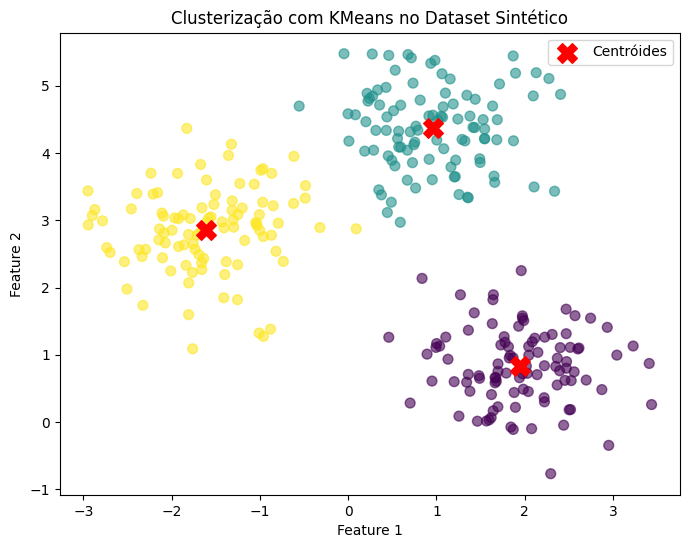

In [29]:
# Aplicar o KMeans com 3 clusters
K = 3
kmeans = KMeans(n_clusters = K)
data_sintetico['Cluster'] = kmeans.fit_predict(X_sintetico)

# Obter os centróides
centroids = kmeans.cluster_centers_

# Plotar os clusters
plt.figure(figsize=(8, 6))

# Plotar os pontos dos clusters
plt.scatter(data_sintetico['Feature 1'], data_sintetico['Feature 2'], c=data_sintetico['Cluster'], cmap='viridis', s=50, alpha=0.6)

# Plotar os centróides
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centróides')

# Títulos e rótulos
plt.title('Clusterização com KMeans no Dataset Sintético')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



##### **4.1 Método do Cotovelo (Elbow Method)**

O **Método do Cotovelo** é uma técnica usada para determinar o número ideal de clusters. A ideia é executar o KMeans com diferentes valores de **K** e calcular a **soma das distâncias quadradas dentro dos clusters** (também conhecida como Inertia). O gráfico resultante mostra a relação entre **K** e a Inertia, e o ponto onde a diminuição da Inertia começa a desacelerar (formando um "cotovelo") indica o valor de **K** ideal.



/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

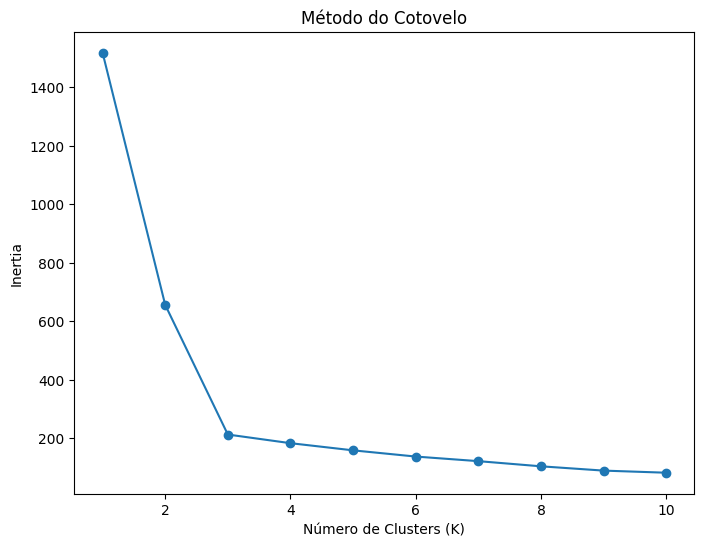

In [21]:

# Lista para armazenar a Inertia para diferentes valores de K
inertia = []

# Testar para diferentes valores de K (de 1 a 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_sintetico)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia')
plt.show()





**Explicação do gráfico:**
- O gráfico exibirá a **Inertia** (ou soma das distâncias quadradas) para diferentes valores de **K**.
- O **cotovelo** no gráfico indica o ponto onde a diminuição da Inertia começa a ser mais lenta. Esse é o valor ideal de **K** para o nosso conjunto de dados.





##### **4.2 Índice de Silhueta (Silhouette Score)**

O **Índice de Silhueta** é uma medida de quão bem os pontos dentro de um cluster estão agrupados em relação aos pontos de outros clusters. O índice varia de **-1 a 1**:
- **1**: indica que os clusters estão bem separados.
- **0**: indica que os pontos estão no limite entre dois clusters.
- **Valores negativos**: indicam que os pontos estão mal agrupados e podem estar no cluster errado.

A ideia aqui é executar o KMeans para diferentes valores de **K** e calcular o **índice de silhueta** para cada valor. O valor de **K** com o maior índice de silhueta será o ideal.





/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

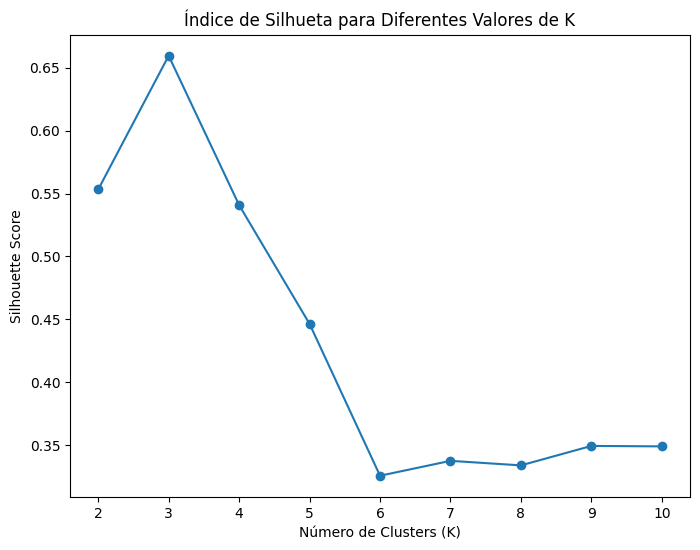

In [22]:
# Lista para armazenar os índices de silhueta
silhouette_scores = []

# Testar para diferentes valores de K (de 2 a 10, já que K=1 não faz sentido para silhueta)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_sintetico)
    score = silhouette_score(X_sintetico, kmeans.labels_)
    silhouette_scores.append(score)

# Plotar o gráfico do índice de silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Índice de Silhueta para Diferentes Valores de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()



**Explicação do gráfico:**
- O gráfico mostra o **índice de silhueta** para diferentes valores de **K**.
- O valor de **K** que apresenta o **índice de silhueta** mais alto indica o número ideal de clusters, já que é o valor onde a separação entre os clusters é melhor.


#### **4.3 Interpretação dos Resultados**

1. **Método do Cotovelo**: O gráfico do método do cotovelo nos ajuda a identificar o ponto onde o benefício de adicionar mais clusters começa a diminuir. O "cotovelo" será o valor de **K** ideal.
   
2. **Índice de Silhueta**: O gráfico do índice de silhueta nos permite avaliar a qualidade da clusterização. O valor de **K** com o maior índice de silhueta é o que proporciona a melhor separação entre os clusters.




### **Questões opcionais para Determinar o Número Ideal de Clusters**

#### **Questão opcional 1: Dataset Iris**

**Enunciado:**  
Utilize o dataset **Iris**, carregado anteriormente na prática, e aplique o **método do cotovelo** e o **índice de silhueta** para descobrir qual é a quantidade ideal de clusters (K) para o algoritmo KMeans.  

1. **Passos sugeridos para o método do cotovelo:**
   - Execute o KMeans para valores de **K** variando de 1 a 10.
   - Calcule a **inertia** para cada valor de **K**.
   - Plote o gráfico do método do cotovelo e identifique o "cotovelo".

2. **Passos sugeridos para o índice de silhueta:**
   - Execute o KMeans para valores de **K** variando de 2 a 10 (K=1 não é válido para silhueta).
   - Calcule o **índice de silhueta** para cada valor de **K**.
   - Plote o gráfico do índice de silhueta e identifique o valor de **K** com o maior índice.

**Pergunta 1.1**: Qual é o valor ideal de **K** no dataset Iris, com base no método do cotovelo?  
**Pergunta 1.2**: O valor de **K** obtido com o índice de silhueta é o mesmo do método do cotovelo? Se não, qual explicação pode justificar a diferença?

---


In [8]:
#Resposta


#### **Questão opcional 2: Dataset Wine**

**Enunciado:**  
Agora, utilizando o dataset **Wine**, realize uma análise similar à da Questão 1 para determinar a quantidade ideal de clusters (K) no algoritmo KMeans.  

1. **Passos sugeridos para o método do cotovelo:**
   - Execute o KMeans para valores de **K** variando de 1 a 10.
   - Calcule a **inertia** para cada valor de **K**.
   - Plote o gráfico do método do cotovelo e identifique o "cotovelo".

2. **Passos sugeridos para o índice de silhueta:**
   - Execute o KMeans para valores de **K** variando de 2 a 10.
   - Calcule o **índice de silhueta** para cada valor de **K**.
   - Plote o gráfico do índice de silhueta e identifique o valor de **K** com o maior índice.

**Pergunta 2.1**: Qual é o valor ideal de **K** no dataset Wine, com base no método do cotovelo?  
**Pergunta 2.2**: O índice de silhueta fornece o mesmo número de clusters ideal que o método do cotovelo para o dataset Wine? Explique sua análise.  



In [9]:
#resposta

## **5. Clusterização com DBSCAN**

O **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** é um algoritmo de clusterização baseado em densidade. Ele identifica clusters como regiões densas de pontos separadas por regiões de baixa densidade. Essa abordagem permite que o DBSCAN:

- Detecte clusters de formatos arbitrários.
- Identifique pontos considerados ruídos (outliers).
- Não exija a especificação do número de clusters previamente, diferentemente do KMeans.

##### **Parâmetros Principais do DBSCAN**

1. **`eps` (epsilon):** Define o raio máximo de uma região ao redor de um ponto para que outros pontos sejam considerados vizinhos.
2. **`min_samples`:** É o número mínimo de pontos que devem estar dentro do raio `eps` para que uma região seja considerada um cluster.

##### **Como Funciona**
1. O algoritmo escolhe um ponto inicial e verifica se ele possui ao menos `min_samples` vizinhos dentro de `eps`.
   - Se sim, inicia um novo cluster.
   - Caso contrário, é considerado ruído.
2. Os vizinhos desse ponto são explorados recursivamente para expandir o cluster.
3. O processo se repete até que todos os pontos sejam processados.

### **Vantagens e Desvantagens**
**Vantagens:**
- Identifica clusters de formas arbitrárias.
- Robusto contra ruído.

**Desvantagens:**
- Sensível à escolha dos parâmetros `eps` e `min_samples`.
- Pode não funcionar bem em datasets com densidades variáveis.



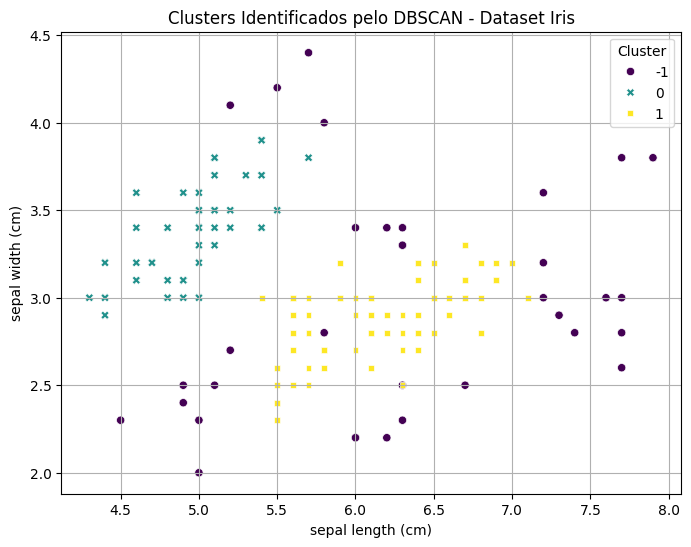

Número de Clusters: 2
Número de Pontos Considerados Ruído: 34


In [36]:
# Padronizar os dados
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(data_iris)

# Aplicar DBSCAN
# Configurar eps e min_samples de forma experimental
dbscan = DBSCAN(eps=.5, min_samples=5)
labels = dbscan.fit_predict(iris_scaled)

# Adicionar os rótulos ao dataset
iris_df = pd.DataFrame(data_iris, columns=iris.feature_names)
iris_df['Cluster'] = labels

# Plotar os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=iris_df.iloc[:, 0],  # Primeira feature
    y=iris_df.iloc[:, 1],  # Segunda feature
    hue=iris_df['Cluster'],
    palette='viridis',
    style=iris_df['Cluster'],
    legend='full'
)
plt.title("Clusters Identificados pelo DBSCAN - Dataset Iris")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title="Cluster")
plt.grid()
plt.show()

# Exibir informações sobre os clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de Clusters: {n_clusters}")
print(f"Número de Pontos Considerados Ruído: {n_noise}")

### **Interpretação dos Resultados**

1. **Clusters Identificados:**
   - O número de clusters detectados pelo DBSCAN depende dos parâmetros `eps` e `min_samples`. Ajustar esses valores pode alterar o resultado.

2. **Pontos Considerados Ruído:**
   - Pontos que não pertencem a nenhum cluster (rotulados como `-1`).

3. **Visualização:**
   - O gráfico exibe os clusters com cores distintas. Pontos ruídos aparecem como uma categoria separada.

### **6. Clusterização Hierárquica**

A **clusterização hierárquica** é um método de agrupamento que organiza os dados em uma hierarquia de clusters. Este tipo de clusterização pode ser representado graficamente por um dendrograma, que ilustra as fusões ou divisões de clusters ao longo de diferentes níveis.


##### **Principais Características**
1. **Dois Tipos de Clusterização Hierárquica:**
   - **Aglomerativa (bottom-up):**  
     Inicia com cada ponto como um cluster individual e vai combinando-os iterativamente até formar um único cluster.
   - **Divisiva (top-down):**  
     Começa com todos os pontos em um único cluster e os divide iterativamente.

2. **Distância Entre Clusters:**
   - O método de cálculo da proximidade entre clusters pode ser feito de várias formas, como:
     - **Single Linkage:** Distância mínima entre pontos de dois clusters.
     - **Complete Linkage:** Distância máxima entre pontos de dois clusters.
     - **Average Linkage:** Média das distâncias entre todos os pontos de dois clusters.
     - **Ward:** Minimiza a soma dos quadrados das distâncias dentro dos clusters.

3. **Dendrograma:**
   - Uma estrutura em forma de árvore que visualiza o processo de clusterização.
   - Ajuda a decidir o número de clusters ao "cortar" a árvore em um nível específico.

##### **Vantagens e Desvantagens**
**Vantagens:**
- Não exige o número de clusters como entrada inicial.
- Adequado para dados pequenos ou moderados.
- Fácil de interpretar visualmente via dendrograma.

**Desvantagens:**
- Não é eficiente para grandes datasets devido ao custo computacional elevado.
- Sensível a outliers, que podem distorcer a estrutura hierárquica.






**6.1  Clusterização Hierárquica no Dataset Iris**

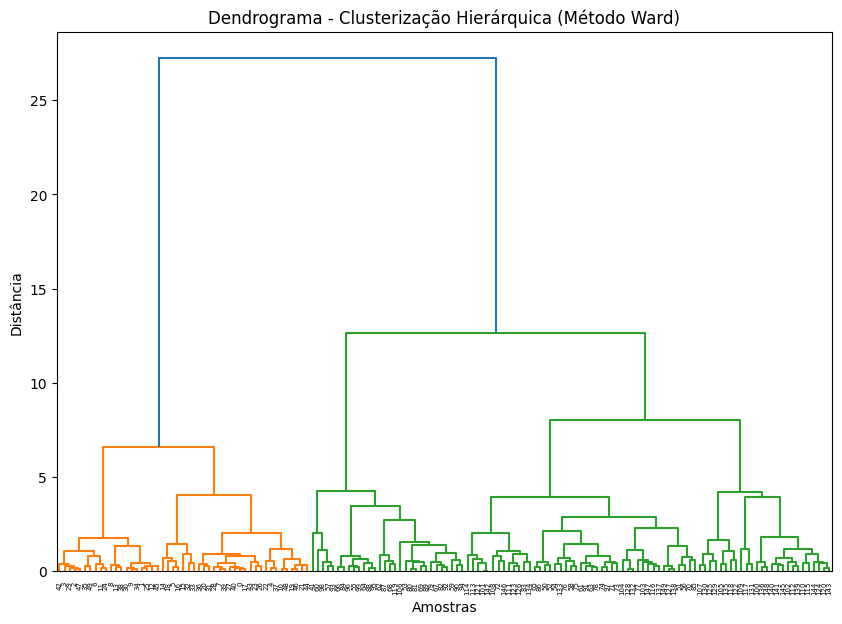

Tamanhos dos clusters:
Cluster
0    71
1    49
2    30
Name: count, dtype: int64


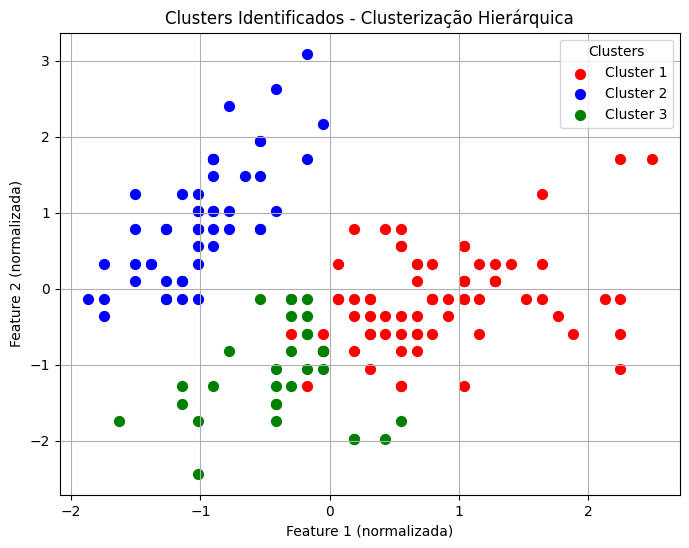

In [37]:

# Padronizar os dados
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(data_iris)

# Construir o dendrograma
plt.figure(figsize=(10, 7))
linked = linkage(iris_scaled, method='ward')
dendrogram(linked, labels=None, truncate_mode=None)
plt.title("Dendrograma - Clusterização Hierárquica (Método Ward)")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()

# Aplicar Clusterização Hierárquica (Agglomerativa)
n_clusters = 3  # Definir o número de clusters com base no dendrograma
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
iris_clusters = hierarchical_clustering.fit_predict(iris_scaled)

# Adicionar os clusters ao DataFrame
iris_df = pd.DataFrame(data_iris, columns=iris.feature_names)
iris_df['Cluster'] = iris_clusters

# Exibir os tamanhos de cada cluster
cluster_sizes = iris_df['Cluster'].value_counts()
print("Tamanhos dos clusters:")
print(cluster_sizes)

# Visualizar clusters usando duas features principais
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']  # Definir cores para os clusters

for cluster in range(n_clusters):
    cluster_points = iris_scaled[iris_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {cluster + 1}', color=colors[cluster], s=50)

plt.title("Clusters Identificados - Clusterização Hierárquica")
plt.xlabel("Feature 1 (normalizada)")
plt.ylabel("Feature 2 (normalizada)")
plt.legend(title="Clusters")
plt.grid()
plt.show()


### **7. Comparação de Algoritmos de Clusterização**

Nesta prática, faremos uma análise comparativa entre os algoritmos **KMeans**, **DBSCAN** e **Clusterização Hierárquica**, utilizando o dataset **make_moons**. Este dataset foi escolhido por sua complexidade moderada: ele apresenta duas regiões com formato de lua crescente, que não são facilmente separáveis por limites lineares. Esse padrão desafia algoritmos como o KMeans, que assume clusters esféricos, tornando-o ideal para observar as diferenças entre os métodos.
Cada algoritmo de clusterização tem seus pontos fortes e fracos, que dependem das características do dataset e da aplicação:

- **KMeans**:
  - Baseia-se na minimização da variância dentro dos clusters.
  - É eficiente e amplamente utilizado, mas pode falhar ao lidar com clusters não esféricos ou de tamanhos desiguais.

- **DBSCAN**:
  - Identifica clusters de densidade, permitindo encontrar agrupamentos de formas arbitrárias.
  - É robusto a outliers, mas sensível à escolha dos parâmetros `eps` (tamanho do raio) e `min_samples` (pontos mínimos para formar um cluster).

- **Clusterização Hierárquica**:
  - Organiza os dados em uma hierarquia de clusters, o que facilita a visualização via dendrogramas.
  - Não exige o número de clusters como entrada inicial, mas pode ser sensível a outliers e menos eficiente para grandes datasets.



/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


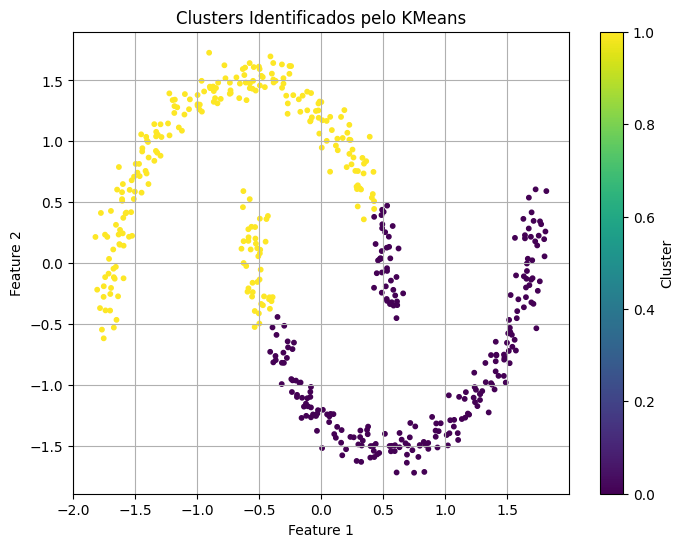

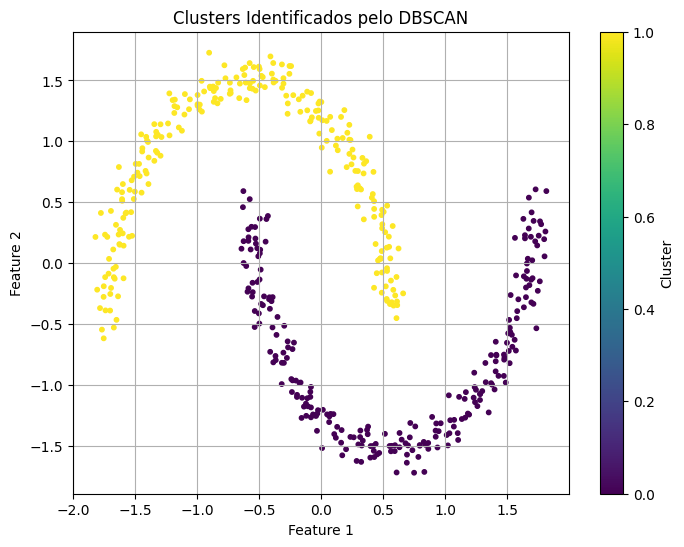

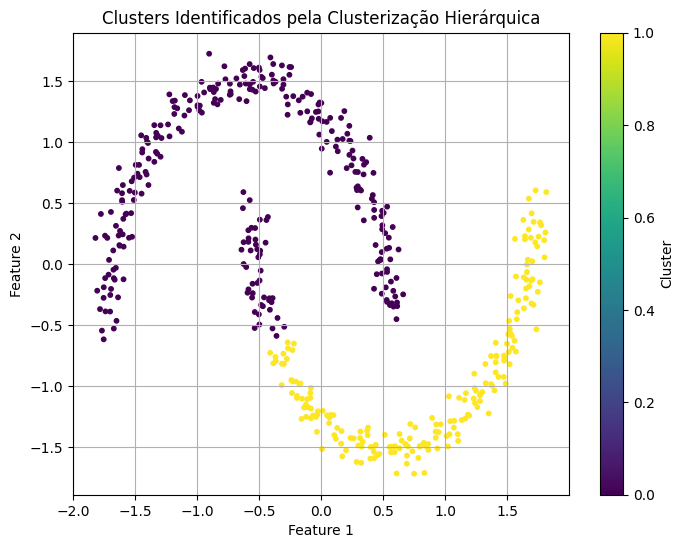

Resumo dos resultados:
KMeans: 2 clusters
DBSCAN: 2 clusters (incluindo ruído)
Clusterização Hierárquica: 2 clusters


In [38]:
# Gerar o dataset sintético
n_samples = 500
noise = 0.05
synthetic_data, _ = make_moons(n_samples=n_samples, noise=noise, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
synthetic_scaled = scaler.fit_transform(synthetic_data)

# 1. Aplicar KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans.fit_predict(synthetic_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(synthetic_scaled[:, 0], synthetic_scaled[:, 1], c=kmeans_clusters, cmap='viridis', s=10)
plt.title("Clusters Identificados pelo KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()

# 2. Aplicar DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_clusters = dbscan.fit_predict(synthetic_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(synthetic_scaled[:, 0], synthetic_scaled[:, 1], c=dbscan_clusters, cmap='viridis', s=10)
plt.title("Clusters Identificados pelo DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()

# Determinar o número de clusters baseado no dendrograma
hierarchical_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clusters = hierarchical_clustering.fit_predict(synthetic_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(synthetic_scaled[:, 0], synthetic_scaled[:, 1], c=hierarchical_clusters, cmap='viridis', s=10)
plt.title("Clusters Identificados pela Clusterização Hierárquica")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()

# Comparação Final
print("Resumo dos resultados:")
print(f"KMeans: {len(set(kmeans_clusters))} clusters")
print(f"DBSCAN: {len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)} clusters (incluindo ruído)")
print(f"Clusterização Hierárquica: {len(set(hierarchical_clusters))} clusters")


In [62]:
# Gerar dados sintéticos para Tempo de Estudo vs Nota
np.random.seed(42)  # Para resultados reproduzíveis
tempo_estudo = np.random.rand(100) * 10  # Tempo de estudo em horas
nota = (10*tempo_estudo + np.random.randint(0, 20, size=100))  # Nota com ruído
nota = np.clip(nota, 0, 100)  # Limitar a nota entre 0 e 100
# Criar DataFrame
data_sintetico_estudo = pd.DataFrame({
    'Tempo_Estudo_horas': tempo_estudo,
    'Nota': nota
})

# Visualizar as primeiras 10 linhas do DataFrame
print("Visualizando as primeiras 10 linhas do dataset sintético (Tempo de Estudo vs Nota):")
data_sintetico_estudo.head(10)

Visualizando as primeiras 10 linhas do dataset sintético (Tempo de Estudo vs Nota):


,Tempo_Estudo_horas,Nota
0,3.745401,43.454012
1,9.507143,100.000000
2,7.319939,92.199394
3,5.986585,62.865848
4,1.560186,19.601864
5,1.559945,21.599452
6,0.580836,17.808361
7,8.661761,100.000000
8,6.011150,70.111501
9,7.080726,73.807258


In [66]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = StandardScaler()
scaler.fit(data_sintetico_estudo)
data_sintetico_estudo_scaled = scaler.transform(data_sintetico_estudo)


Text(0.5, 0, 'Tempo')

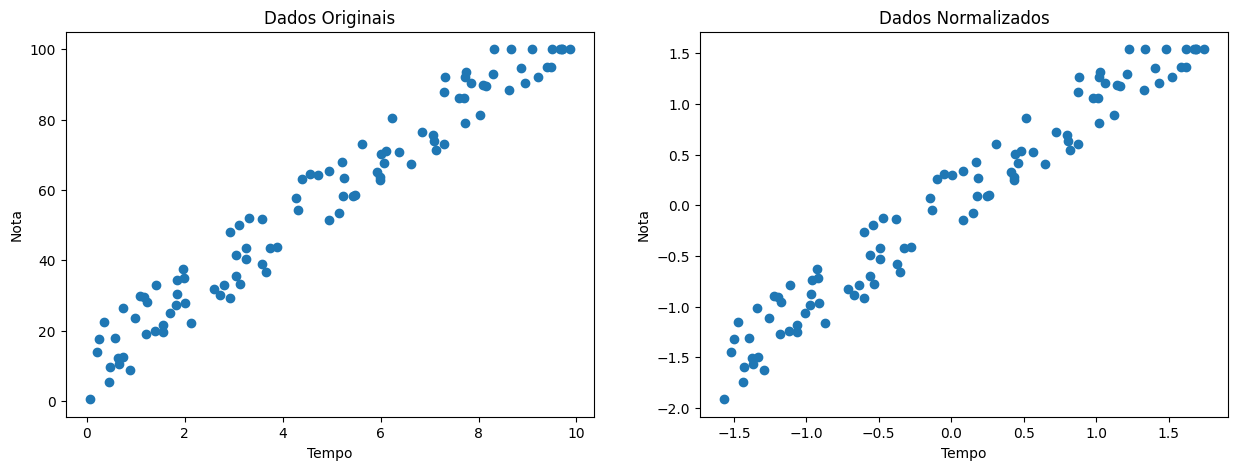

In [88]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].scatter(data_sintetico_estudo['Tempo_Estudo_horas'], data_sintetico_estudo['Nota'])
ax[0].set_title('Dados Originais')
ax[0].set_ylabel('Nota')
ax[0].set_xlabel('Tempo')

ax[1].scatter(data_sintetico_estudo_scaled[:,0], data_sintetico_estudo_scaled[:,1])
ax[1].set_title('Dados Normalizados')
ax[1].set_ylabel('Nota')
ax[1].set_xlabel('Tempo')
